## Customer Segmentation

### In this project, assume that you have been provided with extensive data on bank's customers. The data includes purchases, balance frequency, cash advance, tenure of credit card, etc. The bank marketing team would like to leverage Machine Learning to launch a targeted marketing ad campaign that is tailored to specific group of customers. In order for this campaign to be successful, you have to divide its customers into distinctive groups using KMeans clustering and Principal Component Analysis. The dataset has been downloaded from kaggle.com

### 1. Importing library and analyzing dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('marketing_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
data.isnull().mean()

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.000112
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    0.034972
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

In [6]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Customer with maximum balance in his/her account

In [8]:
data[data['BALANCE'] == 19043.138560 ]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
138,C10144,19043.13856,1.0,22009.92,9449.07,12560.85,0.0,1.0,0.75,1.0,0.0,0,216,18000.0,23018.57583,18621.01331,0.0,12


### Customer with maximum oneoff_purchases in one-go

In [9]:
data[data['ONEOFF_PURCHASES'] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


### Customer with maximum cash_advance purchases

In [11]:
data['CASH_ADVANCE'].max()

47137.211760000006

In [12]:
data[data['CASH_ADVANCE'] == 47137.211760000006 ]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


In [13]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(), inplace = True)

In [14]:
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(), inplace = True)

In [15]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [16]:
data.duplicated().sum()

0

In [17]:
data.drop(['CUST_ID'], axis = 1, inplace = True)

In [18]:
data.shape

(8950, 17)

In [19]:
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

### 2. Vizualize and explore dataset

c:\users\mahesh kumar m r\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


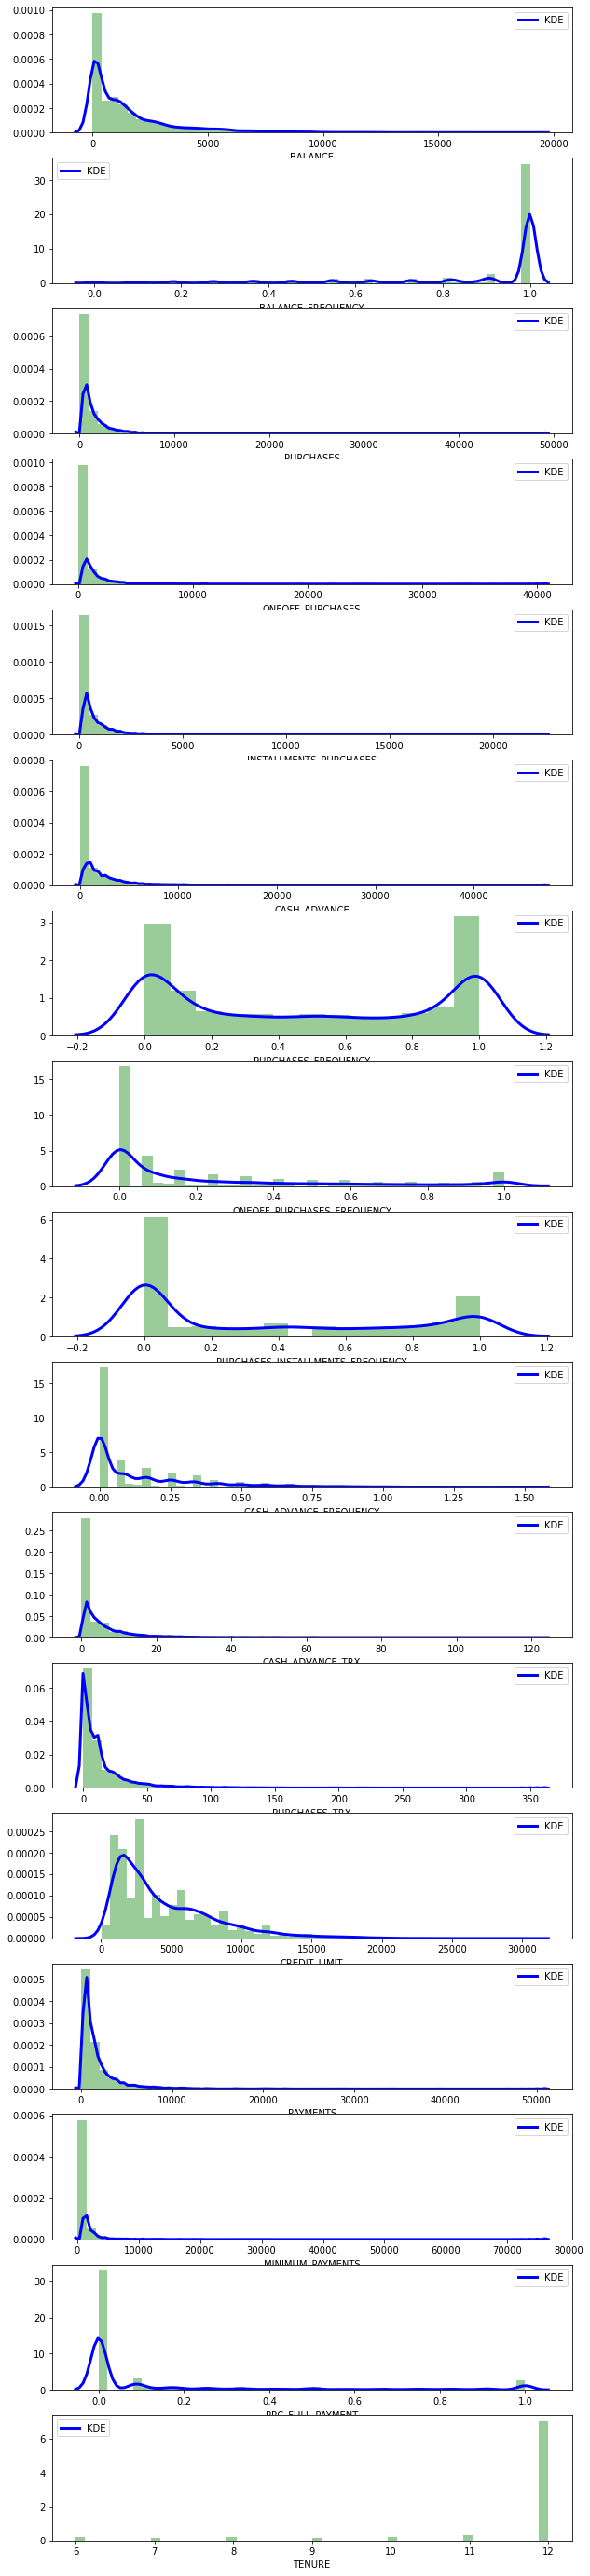

In [23]:
plt.figure(figsize = (10,50))
for i in range(len(data.columns)):
    plt.subplot(17, 1, i+1)
    sn.distplot(data[data.columns[i]], kde_kws = {'color':'b', 'lw':3, 'label':'KDE'}, hist_kws = {'color':'g'})

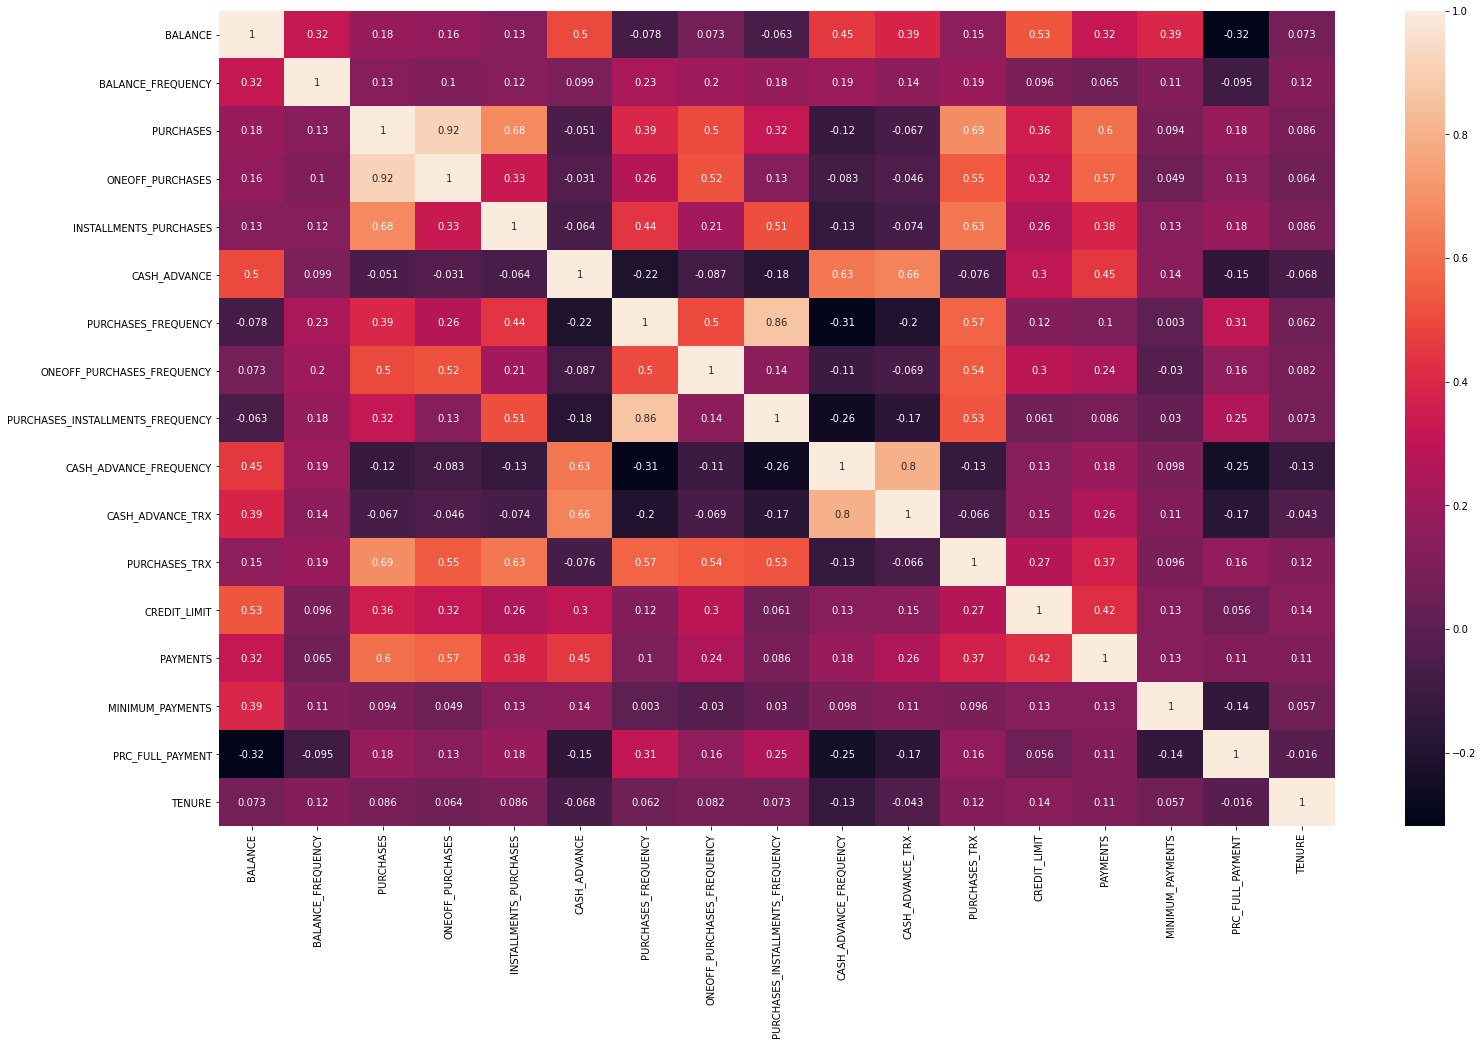

In [73]:
correlations = data.corr()
f,ax = plt.subplots(figsize = (25,15))
sn.heatmap(correlations, annot = True)

In [71]:
correlations['PURCHASES'].sort_values(ascending = False)

PURCHASES                           1.000000
ONEOFF_PURCHASES                    0.916845
PURCHASES_TRX                       0.689561
INSTALLMENTS_PURCHASES              0.679896
PAYMENTS                            0.603264
ONEOFF_PURCHASES_FREQUENCY          0.498430
PURCHASES_FREQUENCY                 0.393017
CREDIT_LIMIT                        0.356959
PURCHASES_INSTALLMENTS_FREQUENCY    0.315567
BALANCE                             0.181261
PRC_FULL_PAYMENT                    0.180379
BALANCE_FREQUENCY                   0.133674
MINIMUM_PAYMENTS                    0.093515
TENURE                              0.086288
CASH_ADVANCE                       -0.051474
CASH_ADVANCE_TRX                   -0.067175
CASH_ADVANCE_FREQUENCY             -0.120143
Name: PURCHASES, dtype: float64

### 3. KMeans Clustering algorithm

In [32]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

Text(0.5, 1.0, 'Finding optimal number of clusters using elbow method')

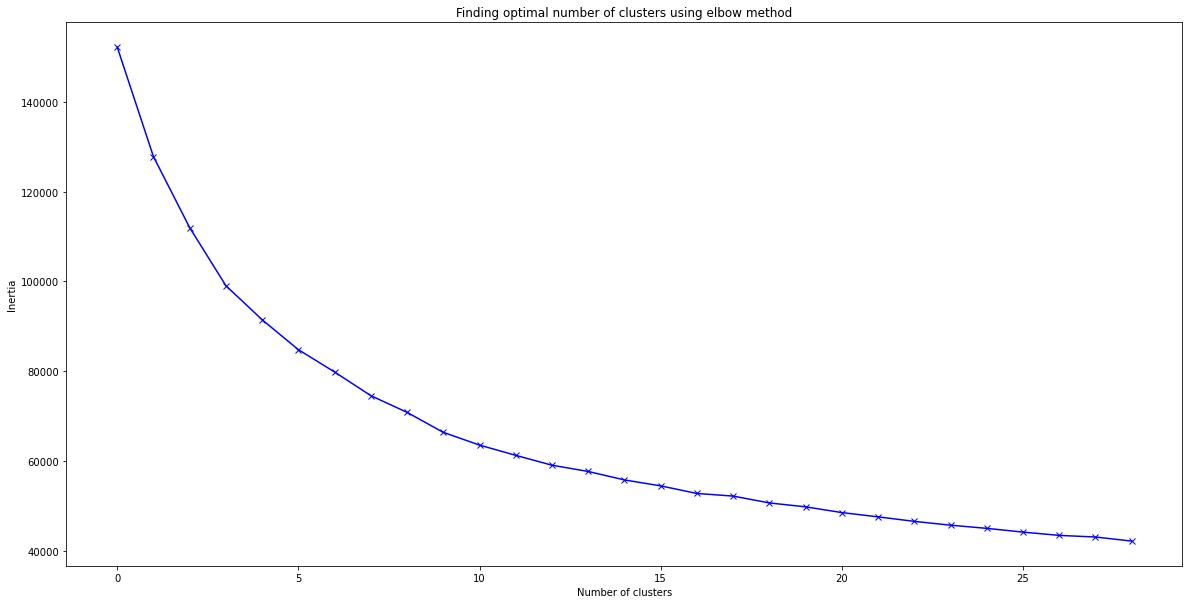

In [34]:
scores = []
range_values = range(1, 30)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data_scaled)
    scores.append(kmeans.inertia_)
    
plt.figure(figsize = (20,10))
plt.plot(scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Finding optimal number of clusters using elbow method')

### 3.1 Apply KMeans clustering algorithm to scaled dataset

In [35]:
kmeans = KMeans(n_clusters = 10)
kmeans.fit(data_scaled)
labels = kmeans.labels_

In [37]:
kmeans.cluster_centers_.shape

(10, 17)

In [38]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [data.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.183804,0.389969,0.447620,0.586526,-0.019315,-0.344955,0.952141,1.899651,0.088219,-0.423963,-0.333701,0.528160,0.359105,0.075866,-0.169234,0.432148,0.260811
1,-0.100184,0.397618,-0.354977,-0.241451,-0.395622,-0.182731,-0.834897,-0.394601,-0.738482,-0.019759,-0.119003,-0.478813,-0.384245,-0.282127,-0.080620,-0.453571,0.279399
2,-0.383462,0.330734,-0.030287,-0.242569,0.373846,-0.368921,1.013380,-0.384559,1.231591,-0.483286,-0.366885,0.196651,-0.261252,-0.214752,-0.108998,0.342845,0.254865
3,0.859003,0.469377,2.275606,1.795269,2.082512,-0.191671,1.163721,1.633048,1.212429,-0.297937,-0.196008,2.767331,1.236821,1.250515,0.264355,0.308896,0.332745
4,1.793950,0.314525,0.014717,0.032004,-0.024303,4.423911,-0.236798,0.000200,-0.195074,2.546079,3.843473,-0.037270,1.354833,3.149171,0.532959,-0.169638,0.032274
5,-0.701138,-2.154451,-0.310115,-0.235119,-0.301191,-0.321517,-0.555481,-0.445865,-0.437351,-0.519656,-0.378463,-0.419499,-0.173723,-0.200172,-0.256008,0.285243,0.201787
6,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
7,1.409948,0.406080,-0.293334,-0.212357,-0.303494,1.207222,-0.607439,-0.303325,-0.522249,1.553721,1.247425,-0.358757,0.777315,0.236235,0.313976,-0.446655,0.107512
8,-0.345691,-0.351380,-0.291013,-0.218503,-0.286299,0.055945,-0.198609,-0.288448,-0.220308,0.293405,-0.013074,-0.387756,-0.575688,-0.394504,-0.210522,0.021042,-3.222184
9,1.180370,0.465753,-0.056179,-0.284877,0.389819,-0.031301,0.036912,-0.555727,0.276551,-0.251168,-0.083087,0.148826,-0.069372,-0.136715,10.521058,-0.525551,0.292749


In [40]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [data.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1181.902988,0.969651,1959.551754,1565.950768,393.600986,255.484645,0.872491,0.769160,0.399498,0.050305,0.971564,27.837915,5801.021112,1952.768656,469.814132,0.280111,11.866351
1,1355.949919,0.971463,244.789968,191.678953,53.311128,595.675337,0.155266,0.084741,0.070946,0.131190,2.436717,2.808330,3096.407872,916.415211,676.325932,0.021053,11.891225
2,766.332029,0.955619,938.495360,189.823337,749.132003,205.225912,0.897069,0.087736,0.853903,0.038434,0.745108,19.597837,3543.908446,1111.459203,610.191478,0.253991,11.858393
3,3352.417689,0.988462,5865.071776,3572.216565,2294.257079,576.927823,0.957408,0.689628,0.846288,0.075524,1.911215,83.495327,8994.509346,5353.260899,1480.275168,0.244061,11.962617
4,5298.429447,0.951779,1034.647898,645.557134,389.090764,10256.019890,0.395312,0.202517,0.286910,0.644641,29.477707,13.783439,9423.885350,10849.686752,2106.244930,0.104098,11.560510
5,105.114908,0.366901,340.639556,202.188488,138.704526,304.635735,0.267409,0.069448,0.190623,0.031156,0.666097,4.282664,3862.373565,1153.666853,267.591109,0.237143,11.787361
6,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
7,4499.163001,0.973467,376.492268,239.968803,136.621602,3510.471790,0.246556,0.111970,0.156882,0.446060,11.761583,5.792471,7322.639523,2417.022024,1595.913437,0.023076,11.661197
8,844.948474,0.794032,381.450016,229.767427,152.171189,1096.191115,0.410639,0.116408,0.276881,0.193858,3.159609,5.071661,2399.860667,591.094647,373.595014,0.159869,7.205212
9,4021.314923,0.987603,883.176591,119.600227,763.576364,913.231699,0.505165,0.036673,0.474346,0.084883,2.681818,18.409091,4242.045455,1337.367541,25383.088762,0.000000,11.909091


In [41]:
labels.shape

(8950,)

In [42]:
labels.max()

9

In [43]:
labels.min()

0

In [45]:
y_kmeans = kmeans.fit_predict(data_scaled)
y_kmeans

array([4, 0, 1, ..., 2, 2, 2])

In [46]:
data_cluster = pd.concat([data, pd.DataFrame({'cluster':labels})], axis = 1)
data_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,7
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [47]:
data_cluster.shape

(8950, 18)

### 3.2 Histogram of various clusters

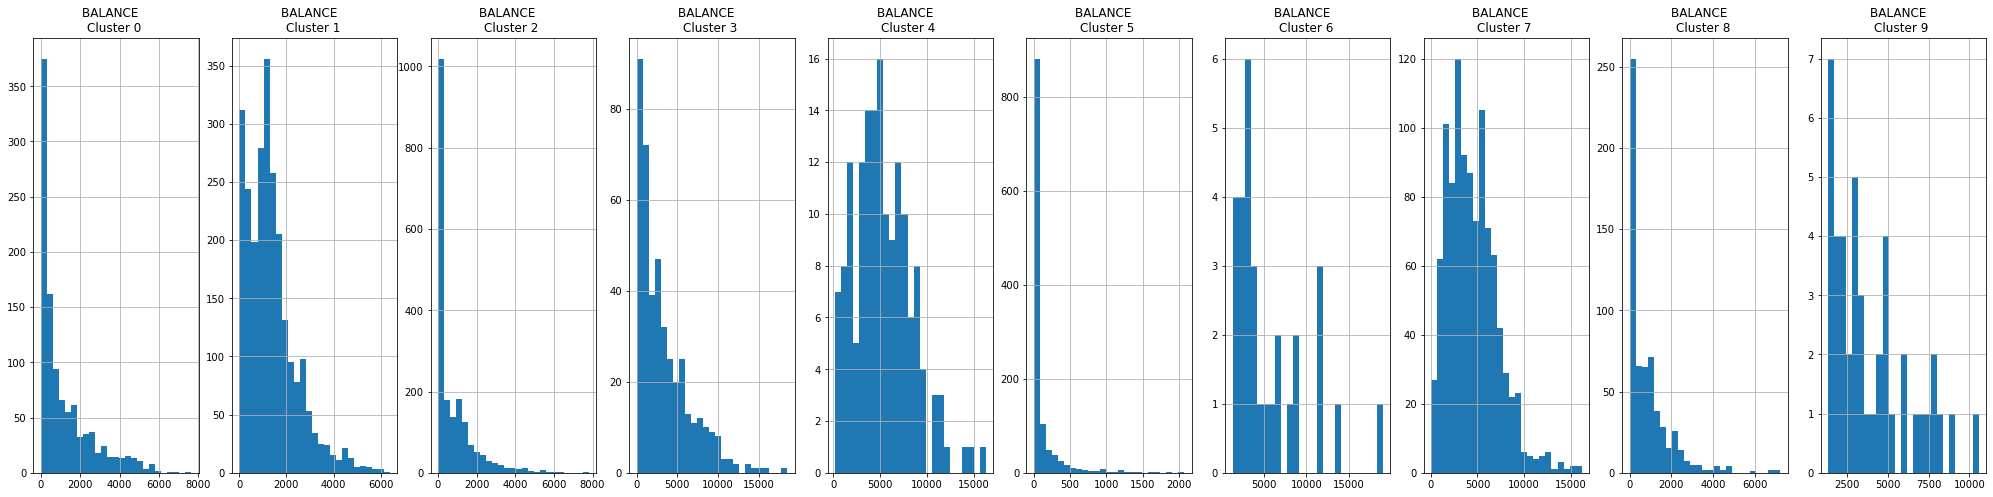

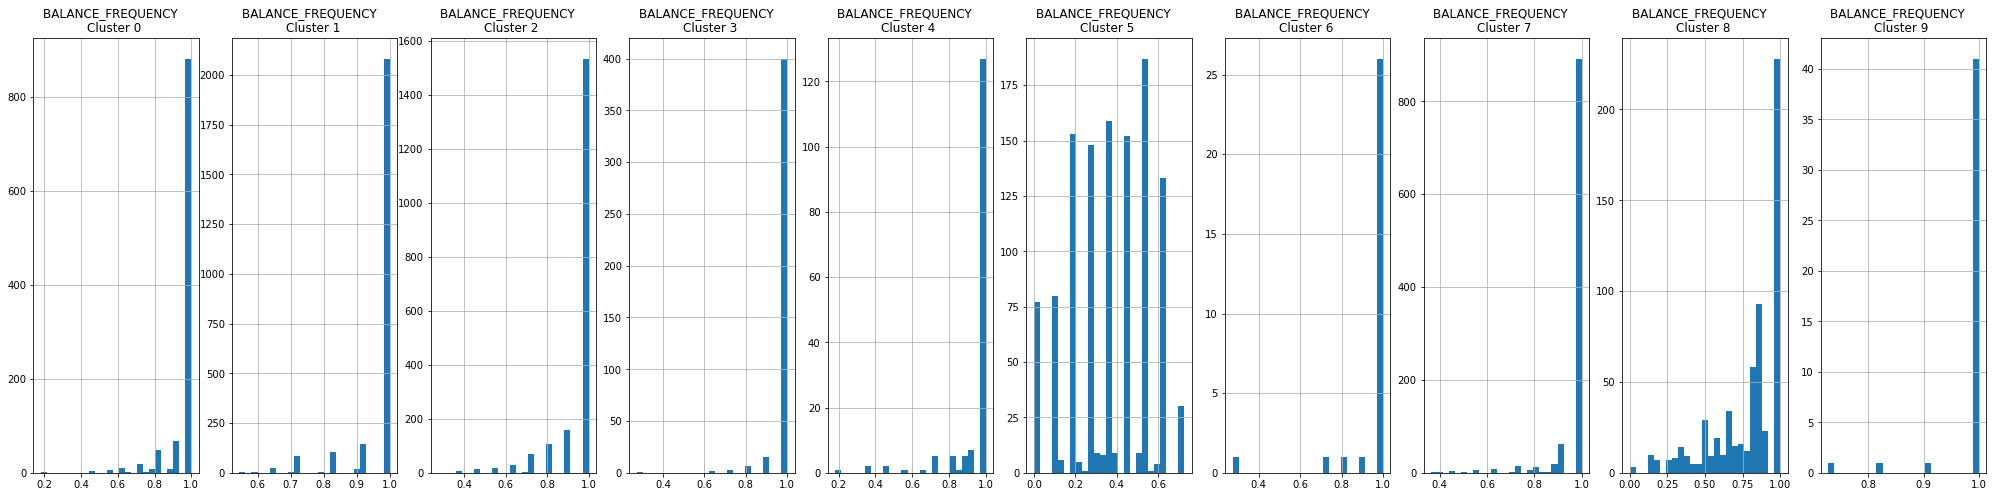

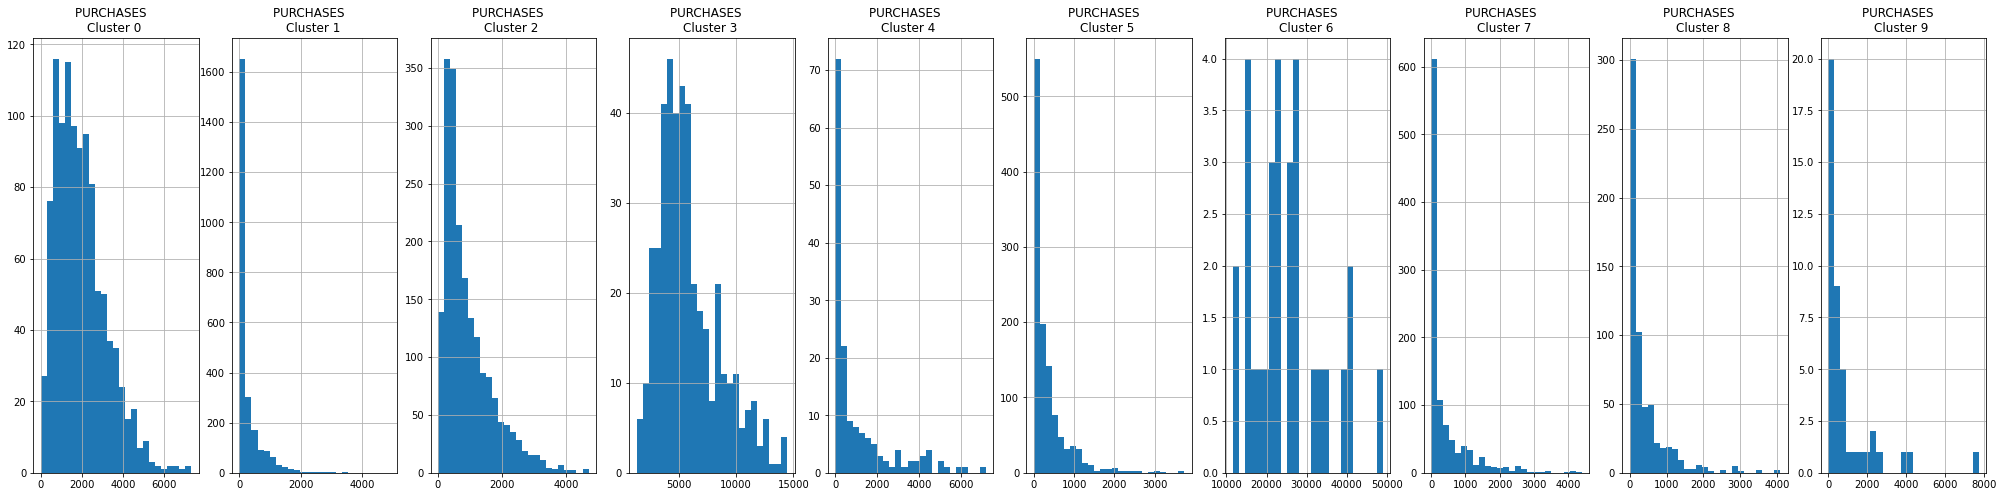

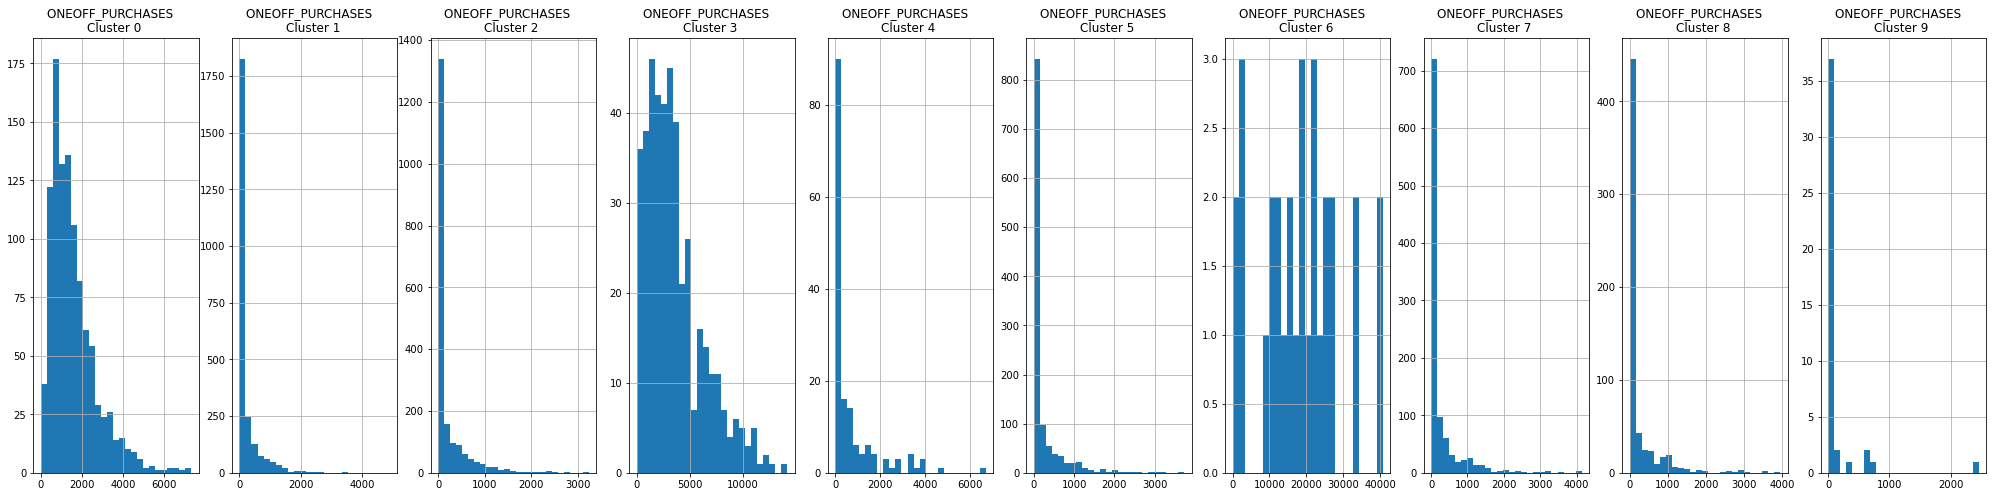

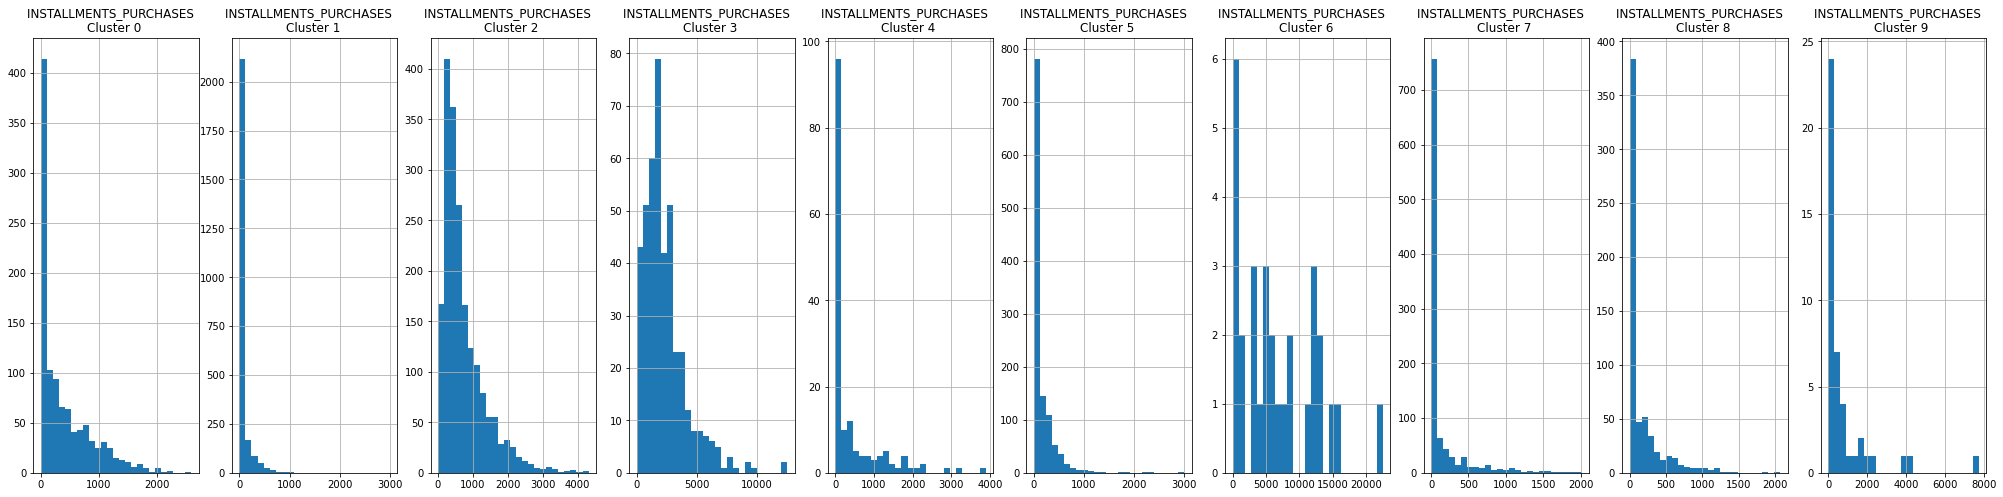

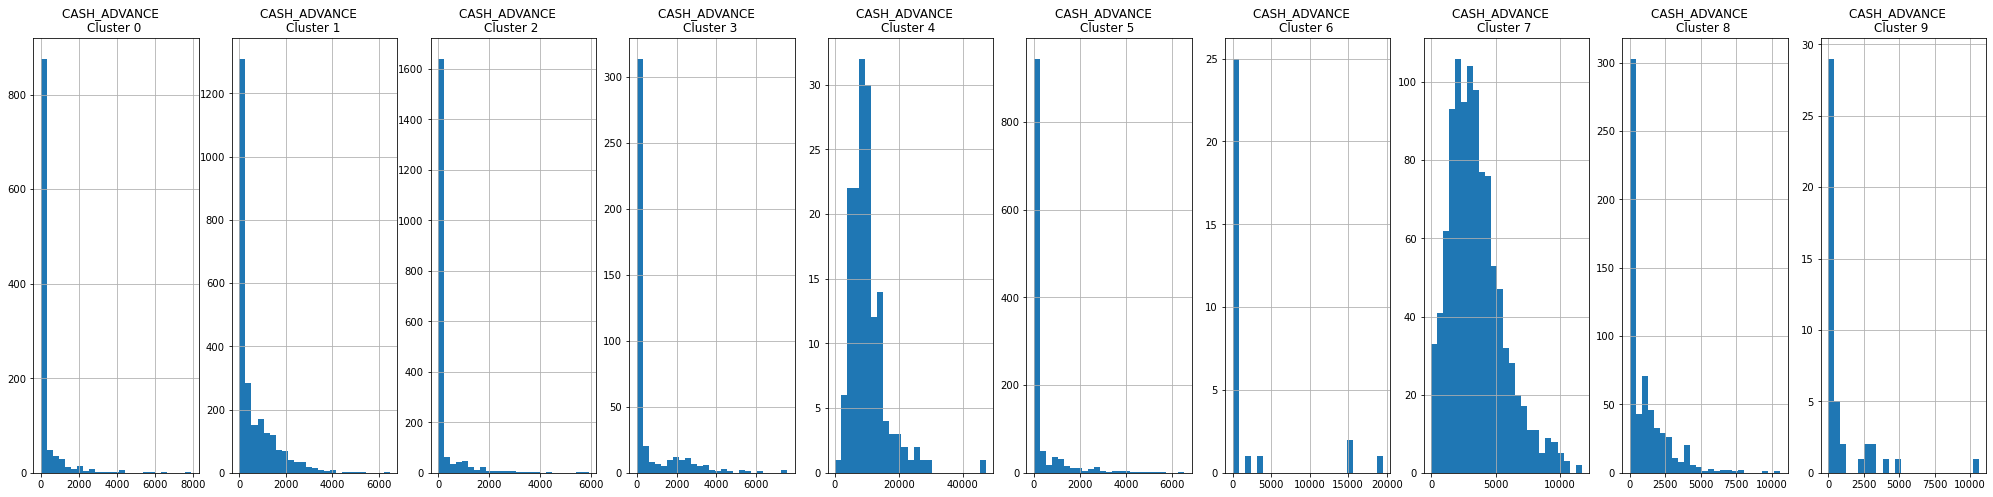

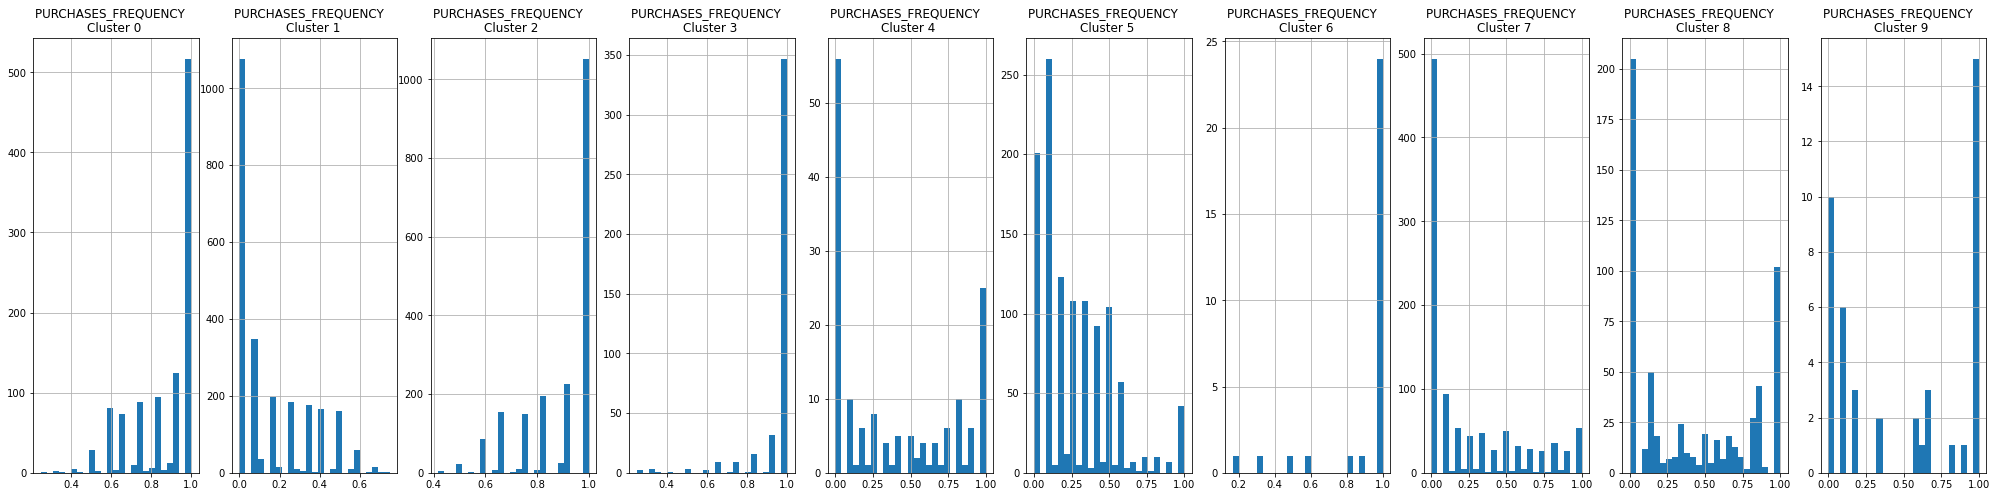

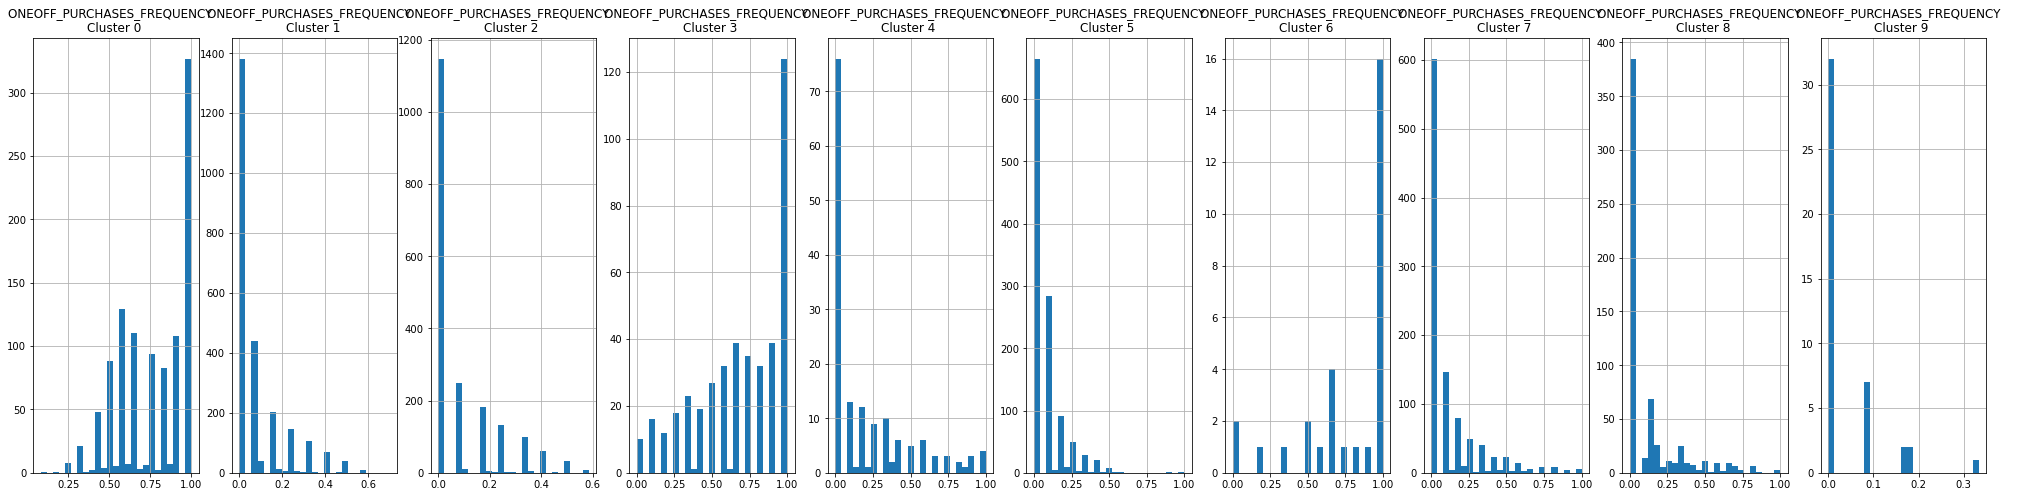

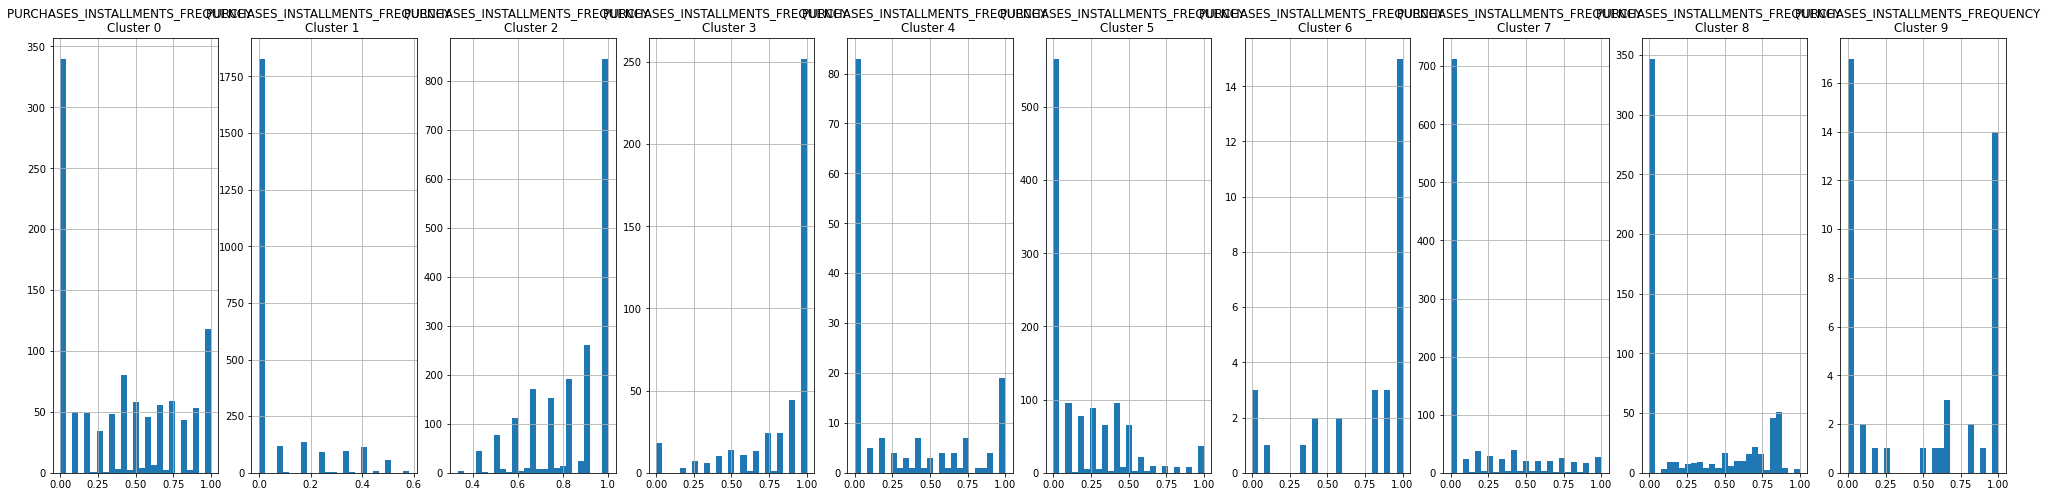

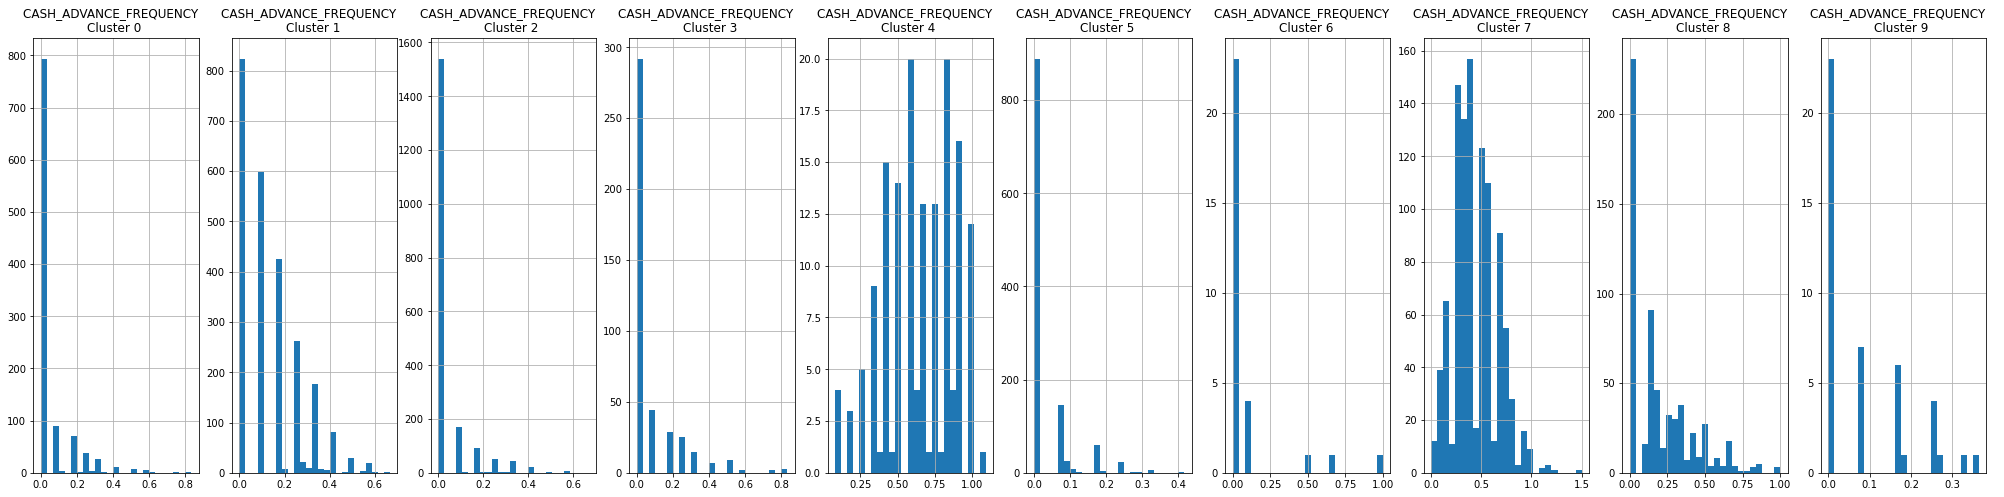

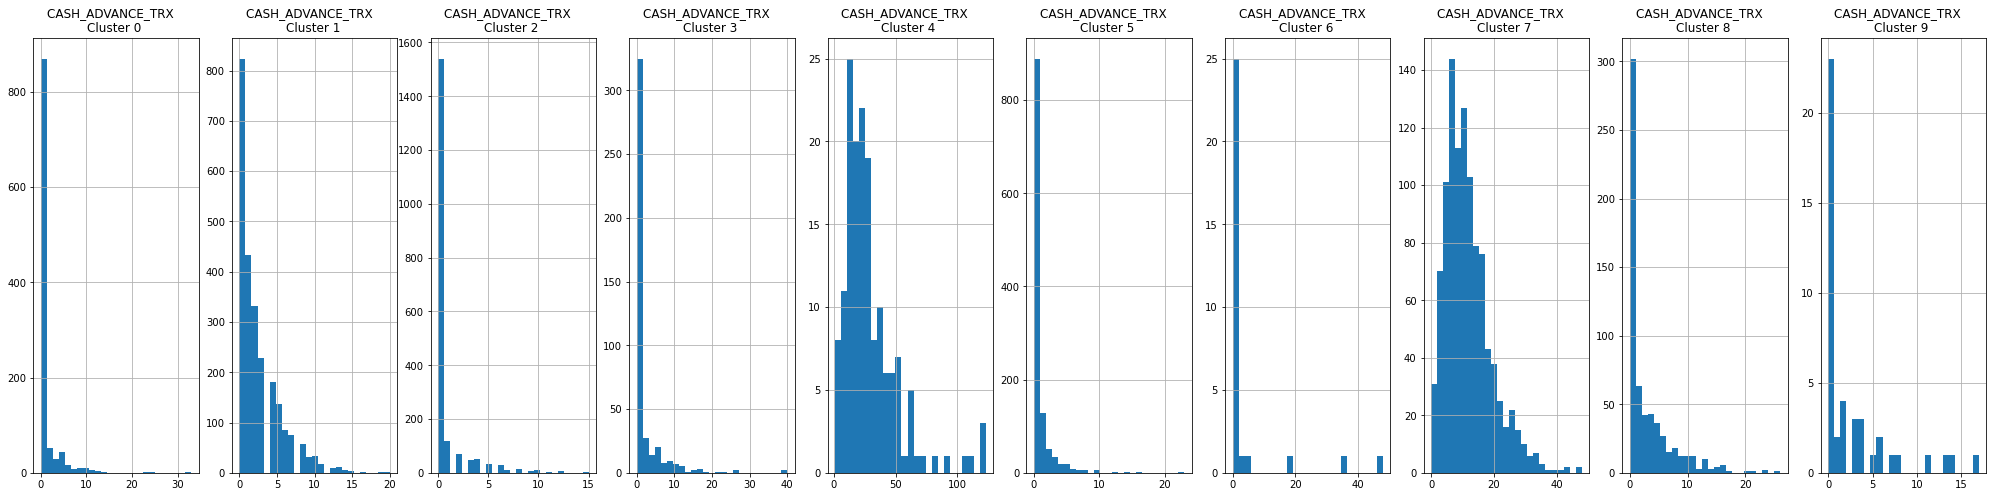

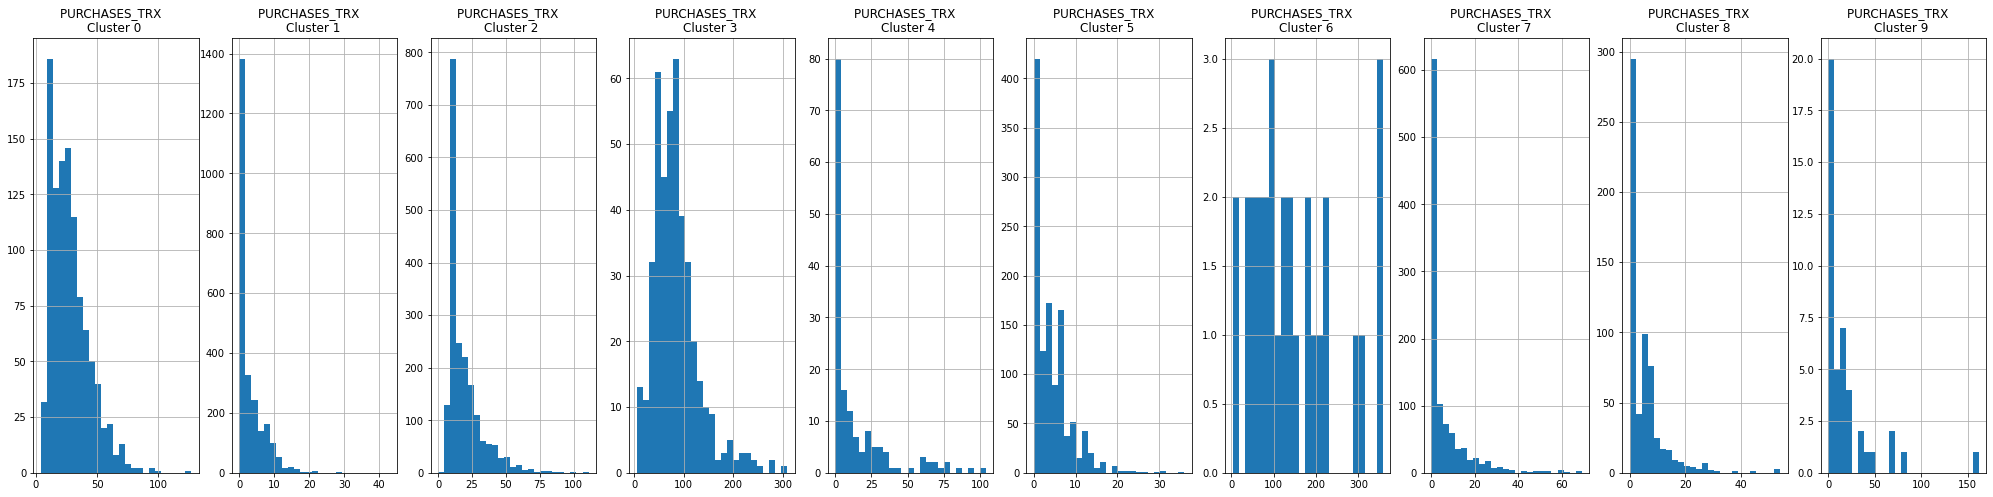

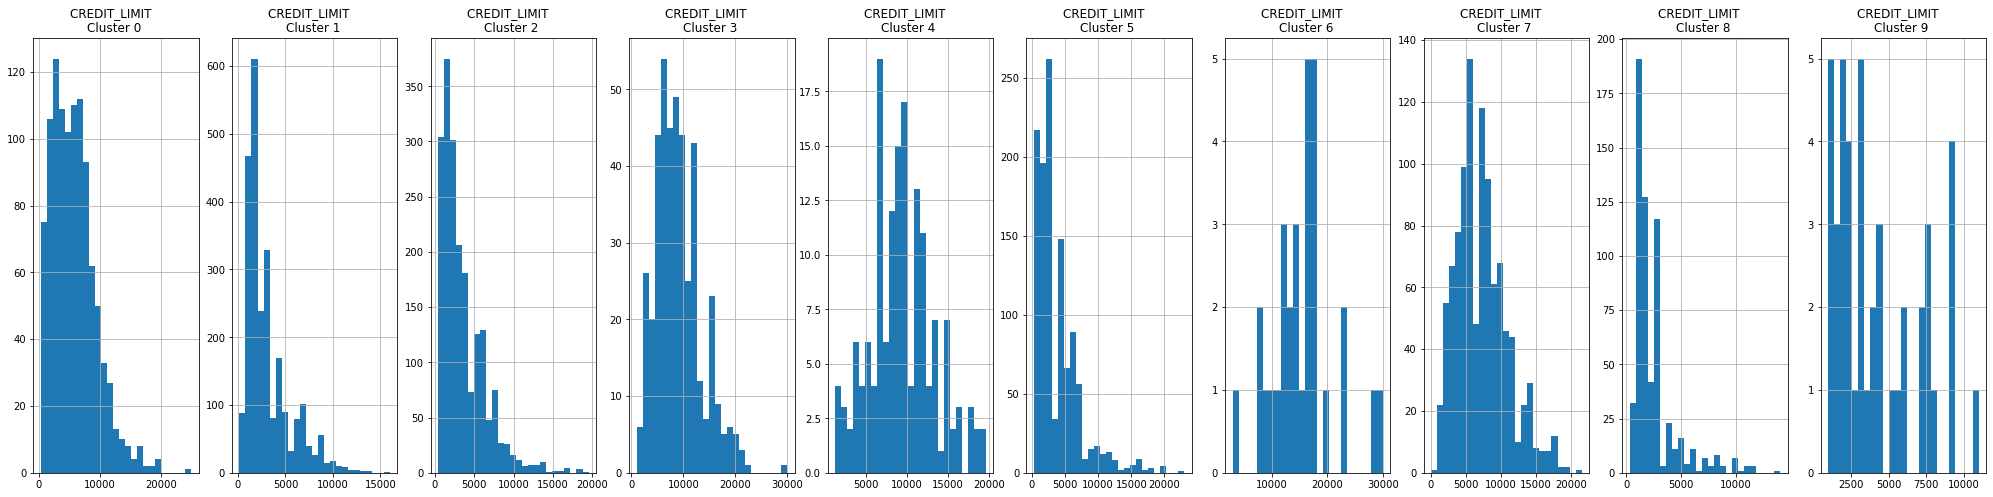

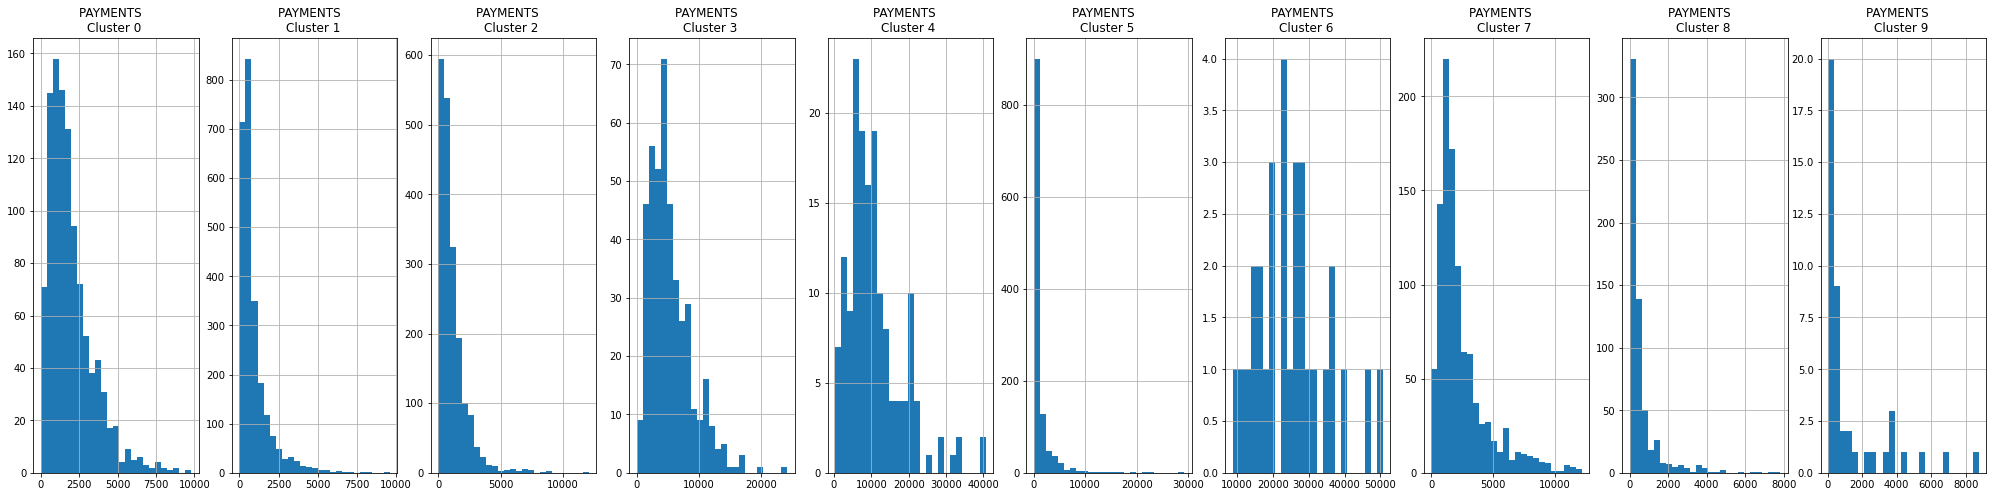

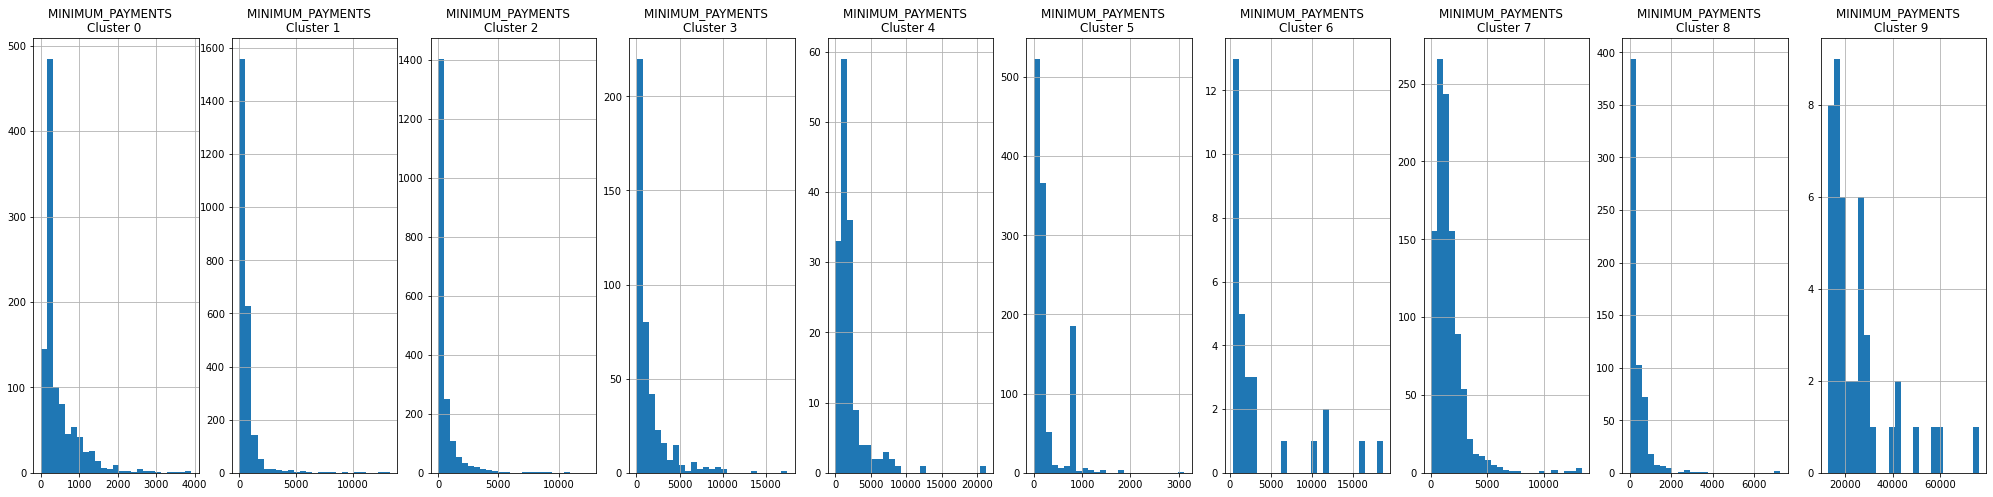

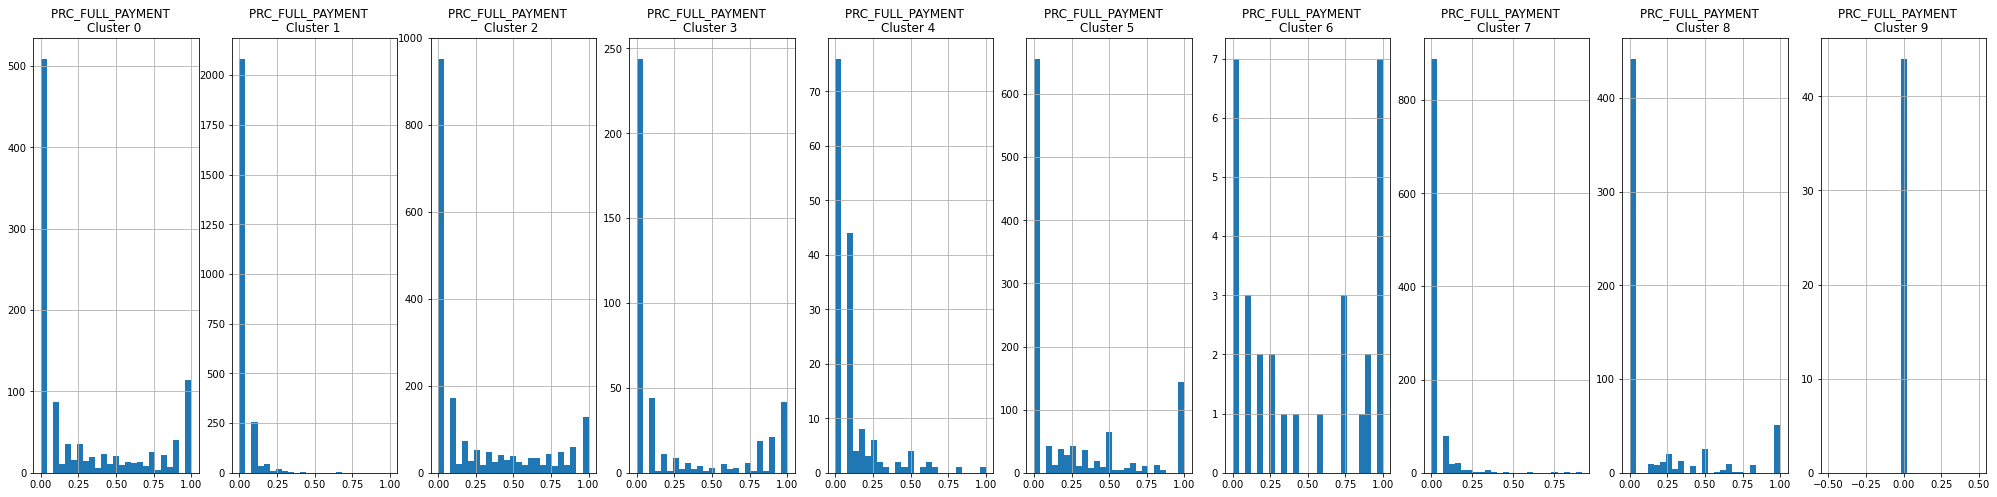

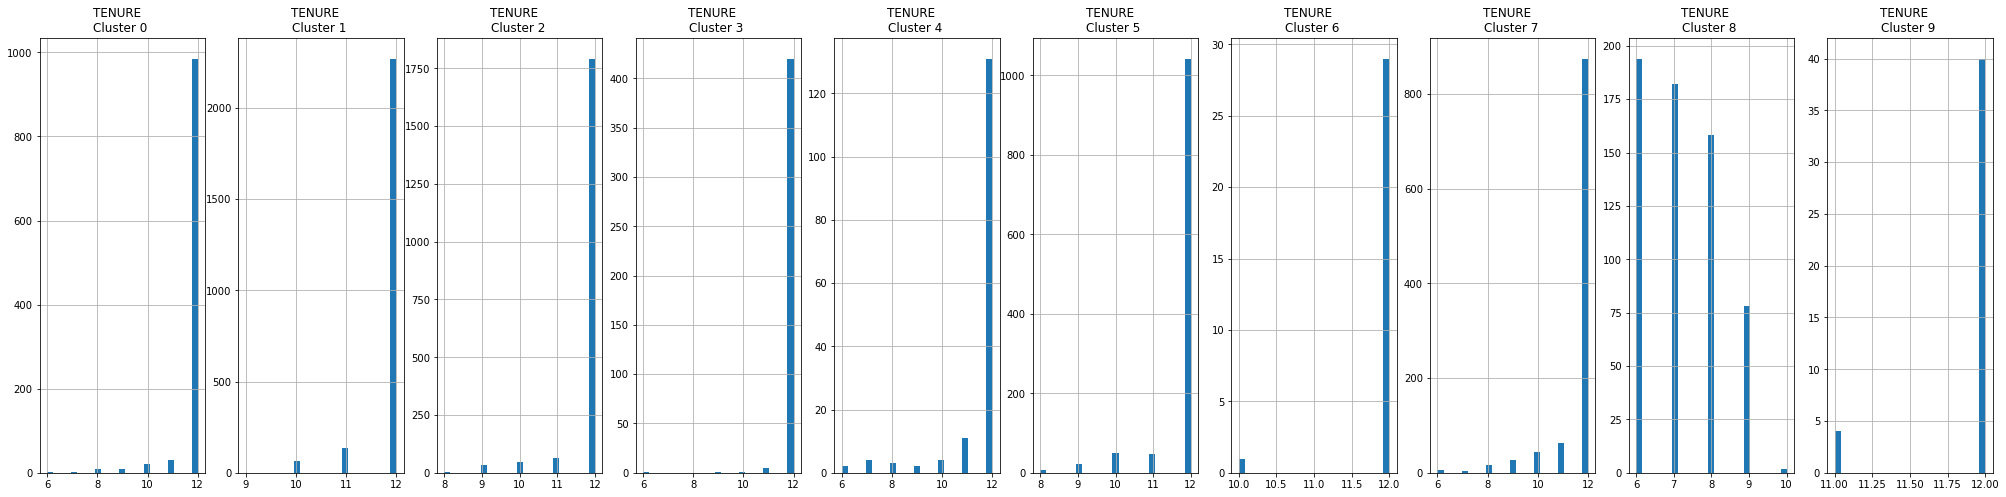

In [55]:
for i in data.columns:
    plt.figure(figsize = (35,8))
    for j in range(10):
        plt.subplot(1, 10, j+1)
        cluster = data_cluster[data_cluster['cluster'] == j]
        cluster[i].hist(bins = 25)
        plt.title('{}   \nCluster {} '.format(i,j))
    plt.show()

### 4. Apply PCA and visualize results

In [57]:
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(data_scaled)
prin_comp

array([[-1.68222068, -1.07644784],
       [-1.13829616,  2.5064832 ],
       [ 0.96968419, -0.38352401],
       ...,
       [-0.92620372, -1.81078436],
       [-2.33655149, -0.65796567],
       [-0.55642119, -0.40047381]])

In [58]:
#create a dataframe with two components
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076448
1,-1.138296,2.506483
2,0.969684,-0.383524
3,-0.873628,0.043169
4,-1.599434,-0.688578


In [59]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682221,-1.076448,1
1,-1.138296,2.506483,7
2,0.969684,-0.383524,0
3,-0.873628,0.043169,1
4,-1.599434,-0.688578,1


In [62]:
np.unique(pca_df['cluster'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

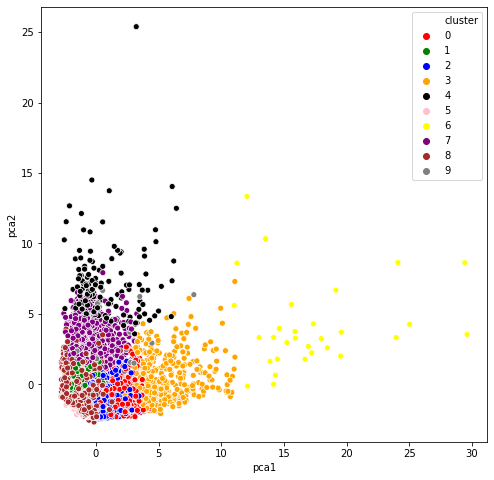

In [70]:
plt.figure(figsize = (8,8))
ax = sn.scatterplot(x = 'pca1', y = 'pca2',hue = 'cluster',data = pca_df, palette = ['red', 'green', 'blue', 'orange', 'black', 'pink', 'yellow', 'purple', 'brown', 'gray'])
plt.show()